# Title: Cloud Instances Recommender for Stand-alone Compute-intensive Class Application

# Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

# Read Dataset for train, test, and verification (LULESH 30)

In [2]:
# dataset best case a2cloud score 
df_train = pd.read_csv("standalone_compute_a2cloudscore.csv")

# LULESH verification dataset  
df_LULESH= pd.read_csv("standalone_compute_a2cloudscore_LULESH_runtime_verfi.csv")


df_train

,a2cloud_score,Cost(per hour USD),Instance
0,3.596212,0.0928,t2.large
1,4.721721,0.0832,B2ms
2,4.031997,0.0950,N1s2
3,5.242235,0.0150,Lin.G
4,2.312340,0.1000,c4.large
...,...,...,...
535,4.219087,0.0230,t2.small
536,1.203311,0.0752,t3a.large
537,3.152672,0.0376,t3a.medium
538,7.819399,0.0188,t3a.small


### Length calculation 

In [3]:
length=df_train.shape
len_train=round(length[0]*0.8)  # 80% of total dataset 
len_test=length[0]-len_train


### Shuffle Training dataset


In [4]:
df_train = shuffle(df_train)

df_train=df_train.append(df_LULESH) # add verification: Kmeans and plot purposes 
df_train

,a2cloud_score,Cost(per hour USD),Instance
528,4.274690,0.1330,r4.large
128,2.989633,0.1330,r4.large
368,2.857893,0.1330,r4.large
440,3.481271,0.0928,t2.large
69,3.470837,0.1260,E2s
...,...,...,...
55,3.761650,0.0230,t2.small
56,2.140732,0.0752,t3a.large
57,2.132792,0.0376,t3a.medium
58,2.203279,0.0188,t3a.small


### Data Visualization

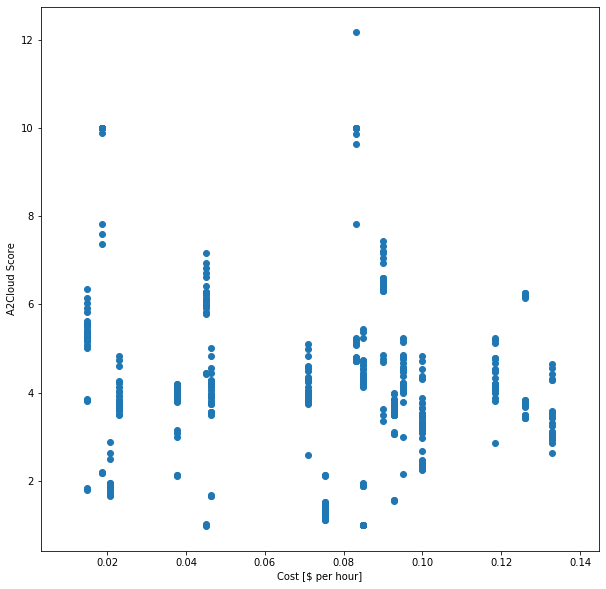

In [5]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')
plt.show()

# K Means

In [6]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 2, 0, 3, 0, 3, 0,
       0, 0, 3, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 3, 0, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       3, 3, 3, 0, 2, 0, 3, 0, 1, 0, 0, 2, 3, 3, 3, 2, 0, 0, 0, 1, 3, 2,
       0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 2, 2, 0, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 1, 3, 2, 0, 2, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 3, 2, 0, 3, 1, 3, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 2, 0, 0, 0, 2, 0, 3,
       0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 2, 0,

In [7]:
df_train['cluster']=labels

### Data Visualization


Text(0, 0.5, 'A2Cloud Score')

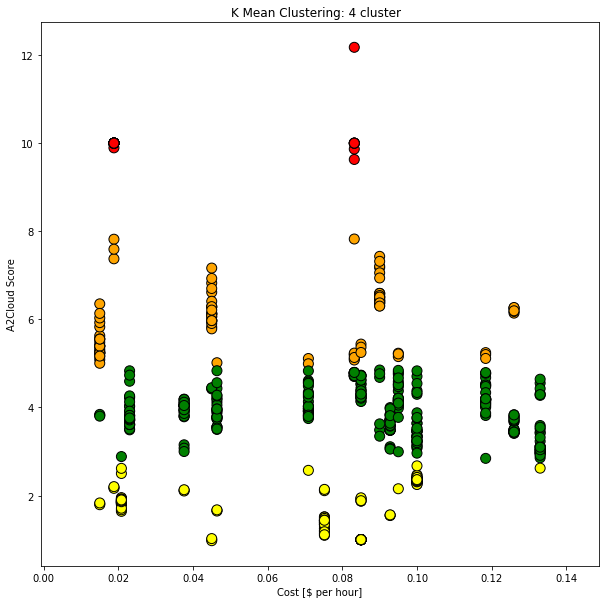

In [8]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad


In [9]:
df_train.head(10)

,a2cloud_score,Cost(per hour USD),Instance,cluster
528,4.274690,0.1330,r4.large,0
128,2.989633,0.1330,r4.large,0
368,2.857893,0.1330,r4.large,0
440,3.481271,0.0928,t2.large,0
69,3.470837,0.1260,E2s,0
510,5.245100,0.1184,N1M2,3
150,5.201604,0.1184,N1M2,3
85,4.306695,0.0850,F2s,0
234,4.122175,0.0464,t2.medium,0
250,4.195702,0.1184,N1M2,0


In [10]:
df_train.tail(10)

,a2cloud_score,Cost(per hour USD),Instance,cluster
50,3.871436,0.1184,N1M2,0
51,3.628005,0.0900,Lin.M,0
52,1.884027,0.0850,c5.large,2
53,3.531379,0.1000,m4.large,0
54,1.676242,0.0464,t2.medium,2
55,3.761650,0.0230,t2.small,0
56,2.140732,0.0752,t3a.large,2
57,2.132792,0.0376,t3a.medium,2
58,2.203279,0.0188,t3a.small,2
59,2.618145,0.0208,t3.small,2


In [11]:
#dataset save as csv file
df_train.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},7)
df_new=df_new.replace({'cluster':1},6)
df_new=df_new.replace({'cluster':2},8)
df_new=df_new.replace({'cluster':3},5)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)

In [12]:
df_new.head(10)


,a2cloud_score,Cost(per hour USD),Instance,cluster
0,4.274690,0.1330,r4.large,3
1,2.989633,0.1330,r4.large,3
2,2.857893,0.1330,r4.large,3
3,3.481271,0.0928,t2.large,3
4,3.470837,0.1260,E2s,3
5,5.245100,0.1184,N1M2,1
6,5.201604,0.1184,N1M2,1
7,4.306695,0.0850,F2s,3
8,4.122175,0.0464,t2.medium,3
9,4.195702,0.1184,N1M2,3


In [13]:
df_train=df_new
df_train

,a2cloud_score,Cost(per hour USD),Instance,cluster
0,4.274690,0.1330,r4.large,3
1,2.989633,0.1330,r4.large,3
2,2.857893,0.1330,r4.large,3
3,3.481271,0.0928,t2.large,3
4,3.470837,0.1260,E2s,3
...,...,...,...,...
595,3.761650,0.0230,t2.small,3
596,2.140732,0.0752,t3a.large,4
597,2.132792,0.0376,t3a.medium,4
598,2.203279,0.0188,t3a.small,4


# Training NB

In [14]:
xtrain=df_train[['a2cloud_score','Cost(per hour USD)']]
xtrain=xtrain[0:len_train]
ytrain=df_train['cluster'].values.tolist()
ytrain=ytrain[0:len_train]

In [15]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing NB 

In [16]:
xtest=df_train[['a2cloud_score','Cost(per hour USD)']]
xtest=xtest[len_train:540]
b=df_train['cluster'].values.tolist()
y_actual=b[len_train:540]

In [17]:
y_pred = classifier.predict(xtest)


In [18]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 99.07407407407408 %


In [19]:
print(confusion_matrix(y_pred, y_actual))


[[21  1  0  0]
 [ 0  5  0  0]
 [ 0  0 56  0]
 [ 0  0  0 25]]


In [20]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        25

    accuracy                           0.99       108
   macro avg       0.96      0.99      0.97       108
weighted avg       0.99      0.99      0.99       108



### Plot Confusion Matrix 

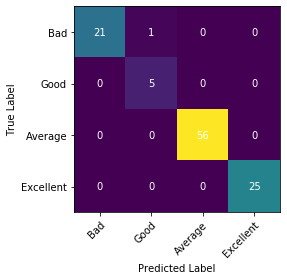

In [21]:
a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]
cm=confusion_matrix(y_pred, y_actual)
fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

# LULESH VERIFICATION

In [36]:
# read qode dataset 

x_LULESH=df_train[['a2cloud_score','Cost(per hour USD)']]
x_LULESH=x_LULESH[540:600]


In [38]:
# make predictions 
y_pred = classifier.predict(x_LULESH)

# read actual output value from dataset 
y_actual=b[540:600]

In [39]:
print('Model Accuracy is',100*accuracy_score(y_actual,y_pred),'%')


Model Accuracy is 95.0 %


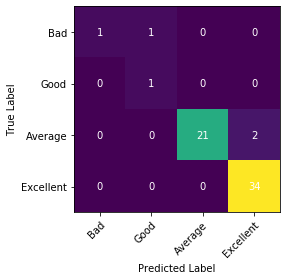

In [40]:
a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]
cm=confusion_matrix(y_pred, y_actual)
fig, ax = plt.subplots()
im = ax.imshow(cm)
# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

In [41]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.50      1.00      0.67         1
           3       1.00      0.91      0.95        23
           4       0.94      1.00      0.97        34

    accuracy                           0.95        60
   macro avg       0.86      0.85      0.81        60
weighted avg       0.96      0.95      0.95        60



# Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]

In [42]:
# Input from user http://localhost:8888/notebooks/Desktop/Cloud_Instance_recommender/Stand-alone%20Model%20/NB_3application_class/Balanced/stand_alone_balanced_NB.ipynb#Get-Instance-Suggestion-for-New-application:-Input=[A2Cloud_score,-cost_per_hour]

A2Cloud_score = float(input(' A2Cloud Score (1 to 10): '))
cost = float(input('Cost of instance (per hour): '))

# prediction function implementation
def Prediction(A2Cloud_score,cost):
    y_pred = classifier.predict((np.array([A2Cloud_score,cost])).reshape(1, -1))[0]
    return y_pred
    
# prediction function call 
guess_cluster=Prediction(A2Cloud_score,cost) 

#slice dataset based on the predicited cluster 
training=df_train[0:len_train]
training=training[training['cluster']==guess_cluster]

 A2Cloud Score (1 to 10): 2.02
Cost of instance (per hour): 0.10


### Mulitple Instance Recommendation 

In [43]:
# calculate unique instances name in the predicted cluster 
instance=training['Instance'].unique()
print("The Recommended Instances are: ",instance)

The Recommended Instances are:  ['t3a.large' 't3.small' 'c4.large' 'c5.large']


In [44]:
### Single Instance Recommendation 
instance_single=training.sort_values(by=['a2cloud_score', 'Cost(per hour USD)'])
instance_single=instance_single.iloc[0:1,:]
#z.iloc[0,0:1][0],(z.iloc[0,1:2])[0],(z.iloc[0,2:3])[0]
print("Instance recommendation for your App: ",instance_single.iloc[0,2:3][0] )

Instance recommendation for your App:  c5.large
